Чернобаев А.А. М8О-114М-23 <br>
ЛР 1

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Tuple, Callable, Union, List
import sympy as sp
import time

Градиентный спуск и его модификации

- Выбрать [тестовые функции оптимизации](https://ru.wikipedia.org/wiki/Тестовые_функции_для_оптимизации) (2 шт)
- Запрограммировать собственную реализацию классического градиентного спуска
- Запрограммировать пайлайн тестирования алгоритма оптимизации
  - Визуализации функции и точки оптимума
  - Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
  - Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
- Запрограммировать метод вычисления градиента
  - Передача функции градиента от пользователя
  - Символьное вычисление градиента (например с помощью [sympy](https://www.sympy.org/en/index.html)) (на доп балл)
  - Численная аппроксимация градиента (на доп балл)
- Запрограммировать одну моментную модификацию и протестировать ее
- Запрограммировать одну адаптивную модификацию и протестировать ее
- Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их

Функция для рисования графиков

In [36]:
def plot_func(func: Callable, x: np.ndarray, y: np.ndarray,
              name: str, min_point: np.ndarray, 
              found_point: Union[np.ndarray, None] = None) -> None:
    X, Y = np.meshgrid(x, y)
    Z = func(np.array([X, Y]))

    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
    ax.scatter(min_point[0], min_point[1], [func(min_point)], 
               color='black', s=55, alpha=1, 
               label=f'min point ({min_point[0]}, {min_point[1]})',
               marker='*')
    
    if found_point is not None:
        print(found_point)
        ax.scatter(found_point[0], found_point[1], [func(found_point)], 
               color='green', s=55, alpha=1, 
               label=f'found point ({found_point[0]}, {found_point[1]})',
               marker='x')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(name)

    ax.legend()
    fig.colorbar(surf)
    plt.show()

Какой подпункт решается: Выбрать тестовые функции оптимизации (2 шт)

Функция Розенброка

In [37]:
def rosenbrock(x: np.ndarray) -> float:
    return 100 * (x[1] - x[0]**2)**2 + (x[0] - 1)**2

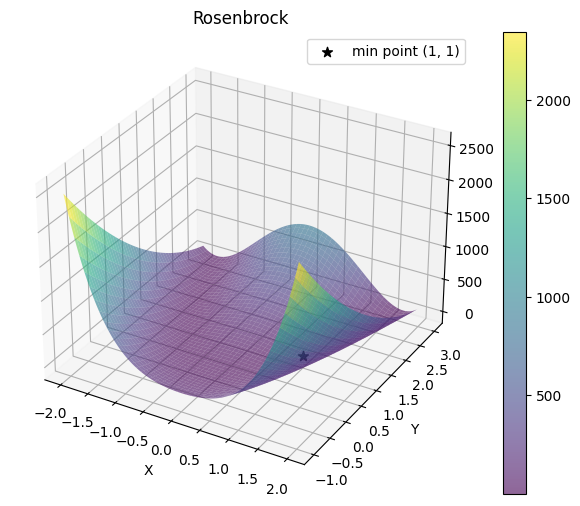

In [38]:
plot_func(rosenbrock, np.linspace(-2, 2, 200), np.linspace(-1, 3, 200),
          'Rosenbrock', np.array([1,1]))

Функция Бута

In [39]:
def booth(x: np.ndarray) -> float:
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5) **2

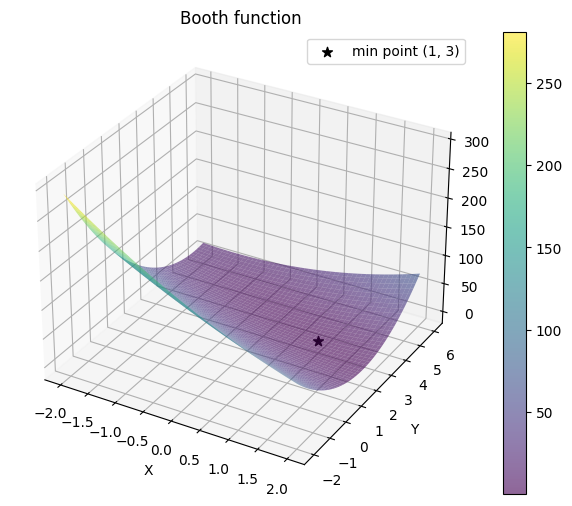

In [40]:
plot_func(booth, np.linspace(-2, 2, 200), np.linspace(-2, 6, 200),
          'Booth function', np.array([1,3]))

Какой подпункт решается: Запрограммировать метод вычисления градиента

Какой подпункт решается: Передача функции градиента от пользователя

In [41]:
def rosenbrock_gradient(x: np.ndarray) -> np.ndarray:
    der_x = 100 * 2 * (x[1] - x[0]**2) * (-2) * x[0] + 2 * (x[0] - 1)
    der_y = 100 * 2 * (x[1] - x[0]**2)
    return np.array([der_x, der_y])

In [42]:
def booth_gradient(x: np.ndarray) -> np.ndarray:
    der_x = 2 * (x[0] + 2*x[1] - 7) + 2 * (2*x[0] + x[1] - 5) * 2
    der_y = 2 * (x[0] + 2*x[1] - 7) * 2 + 2 * (2*x[0] + x[1] - 5)
    return np.array([der_x, der_y])

Какой подпункт решается: Символьное вычисление градиента (например с помощью sympy) (на доп балл)

In [43]:
def calc_rosenbrock_gradient_sumpy() -> Callable:
    x0, x1 = sp.symbols('x0 x1')
    f = 100 * (x1 - x0**2)**2 + (x0 - 1)**2
    gradient = [sp.diff(f, x0), sp.diff(f, x1)]
    return sp.lambdify((x0, x1), gradient, 'numpy')

In [44]:
_rosenbrock_gradient_sumpy = calc_rosenbrock_gradient_sumpy()

def rosenbrock_gradient_sumpy(x: np.ndarray) -> np.ndarray:
    return np.array(_rosenbrock_gradient_sumpy(*x))

In [45]:
def calc_booth_gradient_sumpy() -> Callable:
    x0, x1 = sp.symbols('x0 x1')
    f = (x0 + 2*x1 - 7)**2 + (2*x0 + x1 - 5) **2
    gradient = [sp.diff(f, x0), sp.diff(f, x1)]
    return sp.lambdify((x0, x1), gradient, 'numpy')

In [46]:
_booth_gradient_sumpy = calc_booth_gradient_sumpy()

def booth_gradient_sumpy(x: np.ndarray) -> np.ndarray:
    return np.array(_booth_gradient_sumpy(*x))

Какой подпункт решается: Численная аппроксимация градиента (на доп балл)

In [47]:
def calc_finite_diff(f: Callable, x: np.ndarray):
    h = 0.000000001
    n = len(x)
    gradient = np.zeros(n).astype('float64')
    
    for i in range(n):
        x_plus_h = np.copy(x).astype('float64')
        x_plus_h[i] += h
        x_minus_h = np.copy(x).astype('float64')
        x_minus_h[i] -= h
        gradient[i] = (f(x_plus_h) - f(x_minus_h)) / (2*h)
    
    return np.array(gradient)

In [48]:
def rosenbrock_finite_diff(x: np.ndarray) -> np.ndarray:
    return calc_finite_diff(rosenbrock, x)

In [49]:
def booth_finite_diff(x: np.ndarray) -> np.ndarray:
    return calc_finite_diff(booth, x)

Проверка функций градиента

In [50]:
def check_gradients_results(funcs: List[Callable],
                            cur_points: np.ndarray) -> None:
    for i in range(cur_points.shape[0]):
        cur_point = cur_points[i]
        print(f'cur_point: {cur_point}')
        for func in funcs:
            print(f'{func.__name__}: {func(cur_point)}')
        print('*******************')

Для Розенброка

In [51]:
cur_points = np.array([
    [0,0],
    [1,2],
    [-2,3]
])
check_gradients_results(
    [rosenbrock_gradient, rosenbrock_gradient_sumpy, rosenbrock_finite_diff],
                        cur_points)

cur_point: [0 0]
rosenbrock_gradient: [-2  0]
rosenbrock_gradient_sumpy: [-2  0]
rosenbrock_finite_diff: [-2.00000005  0.        ]
*******************
cur_point: [1 2]
rosenbrock_gradient: [-400  200]
rosenbrock_gradient_sumpy: [-400  200]
rosenbrock_finite_diff: [-400.00001178  200.00001655]
*******************
cur_point: [-2  3]
rosenbrock_gradient: [-806 -200]
rosenbrock_gradient_sumpy: [-806 -200]
rosenbrock_finite_diff: [-806.00005958 -200.00001655]
*******************


Для Бута

In [52]:
check_gradients_results(
    [booth_gradient, booth_gradient_sumpy, booth_finite_diff],
                        cur_points)

cur_point: [0 0]
booth_gradient: [-34 -38]
booth_gradient_sumpy: [-34 -38]
booth_finite_diff: [-34.00000992 -37.99999604]
*******************
cur_point: [1 2]
booth_gradient: [ -8 -10]
booth_gradient_sumpy: [ -8 -10]
booth_finite_diff: [ -8.00000066 -10.00000083]
*******************
cur_point: [-2  3]
booth_gradient: [-30 -24]
booth_gradient_sumpy: [-30 -24]
booth_finite_diff: [-30.00000248 -24.00000199]
*******************


Какой подпункт решается: Запрограммировать собственную реализацию классического градиентного спуска

Классический градиентный спуск

In [53]:
def gd_classic(func: Callable, func_grad: Callable,
                x_0: np.ndarray, iter_count: int = 20000, lr: float = 1e-3,
                eps: float = 1e-7,
                use_criterion: bool = True,
                ):
    history = []
    x = x_0.copy()
    history.append(x)
    i = 0
    for i in range(iter_count):
        u = -lr * func_grad(x)
        if use_criterion and np.linalg.norm(np.abs(u)) <= eps:
            print(f'It has stopped on {i}/{iter_count} iteration')
            print(f'critical point has been already found')
            res = {
                'point': x,
                'value': func(x),
                'history': np.array(history),
                'done_iters': i + 1
            }
            return res
        x += u
        history.append(x)
    print(f'{iter_count} / {iter_count} iterations are done')
    res = {
        'point': x,
        'value': func(x),
        'history': np.array(history),
        'done_iters': i + 1
    }
    return res

Какие подпункты решаются: <br>
Запрограммировать пайлайн тестирования алгоритма оптимизации<br>
 - Визуализации функции и точки оптимума<br>
 - Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков<br>
 - Визуализации точки найденного решения (можно добавить анимацию на плюс балл)<br>

Пайплан для тестирования

In [54]:
def task_pipeline(func: Callable, func_grad: Callable,
                  gd_func: Callable,
                  x: np.ndarray, y: np.ndarray, start_pos: np.ndarray,
                  min_point: np.ndarray,
                  n: int, n_params: List[int], lr: float = 1e-3) -> None:
    for i in range(n):
        start_time = time.time()
        res = gd_func(func, func_grad, start_pos, iter_count=n_params[i], lr=lr)
        x_min = res["point"][0]
        y_min = res["point"][1]
        print(f'found min is ({x_min}, {y_min})')
        print(f'real min is ({min_point[0]}, {min_point[1]})')
        print(f'error (euclidean distance) is: {np.linalg.norm(min_point - res["point"])}')
        print(f"--- {time.time() - start_time} seconds ---")
        func_name = f'{func.__name__} {res["done_iters"]} iterations'
        plot_func(func, x, y, func_name, min_point, res['point'])

Тестирование <br>
Нахождение точки оптиума для функции Розенброка

1000 / 1000 iterations are done
found min is (0.6902404902832658, 0.474958234262185)
real min is (1, 1)
error (euclidean distance) is: 0.6096062742697406
--- 0.016859054565429688 seconds ---
[0.69024049 0.47495823]


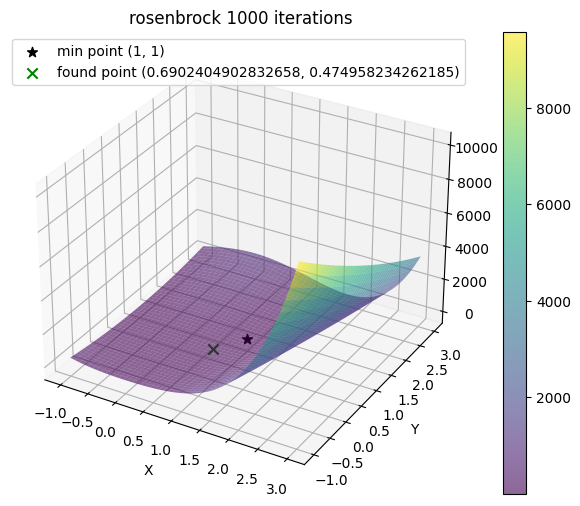

10000 / 10000 iterations are done
found min is (0.9945649379410332, 0.9891375956347911)
real min is (1, 1)
error (euclidean distance) is: 0.012146263959676254
--- 0.1197509765625 seconds ---
[0.99456494 0.9891376 ]


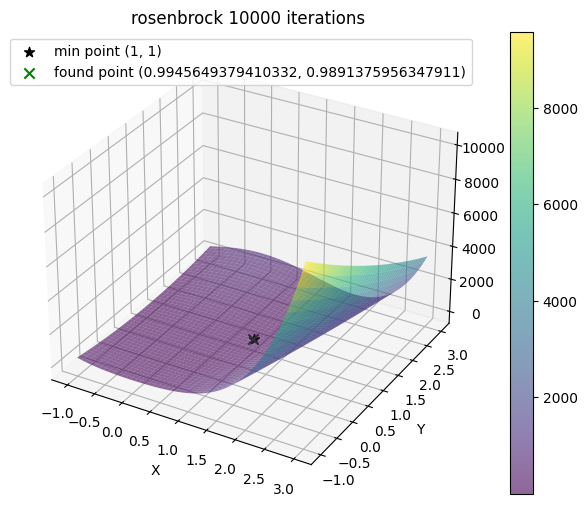

It has stopped on 19703/100000 iteration
critical point has been already found
found min is (0.9998882390731597, 0.9997760433844458)
real min is (1, 1)
error (euclidean distance) is: 0.00025029396800299965
--- 0.19600701332092285 seconds ---
[0.99988824 0.99977604]


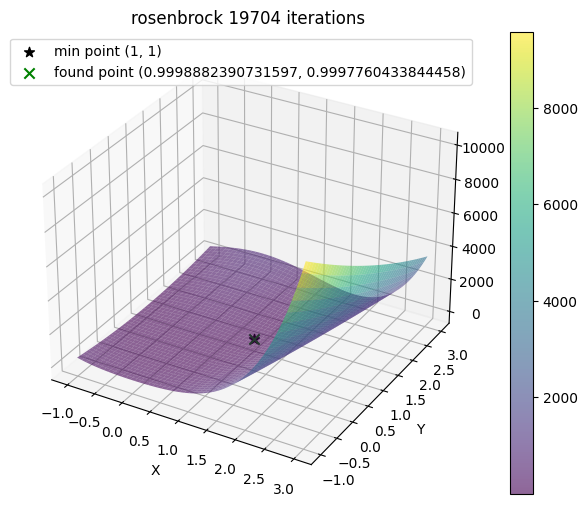

In [55]:
task_pipeline(
    func=rosenbrock, func_grad=rosenbrock_gradient,
    gd_func=gd_classic, x = np.linspace(-1,3, 200),
    y = np.linspace(-1,3,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,1]), n = 3, 
    n_params=list(map(lambda el: int(el), [1e3, 1e4, 1e5]))
)

Используя другие функции для градиента

It has stopped on 19703/100000 iteration
critical point has been already found
found min is (0.9998882390731595, 0.9997760433844455)
real min is (1, 1)
error (euclidean distance) is: 0.0002502939680033968
--- 0.22070932388305664 seconds ---
[0.99988824 0.99977604]


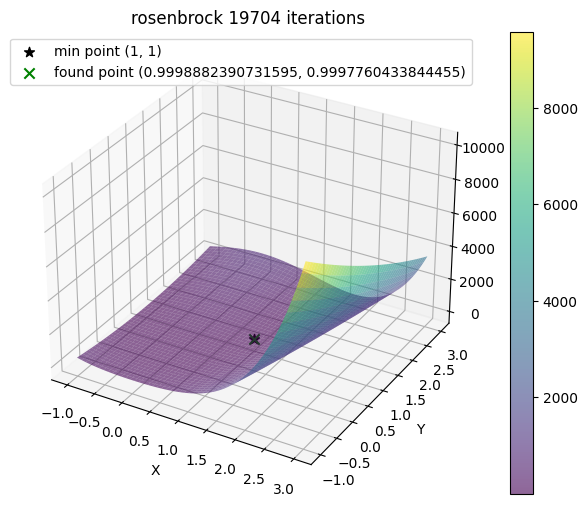

In [56]:
task_pipeline(
    func=rosenbrock, func_grad=rosenbrock_gradient_sumpy,
    gd_func=gd_classic, x = np.linspace(-1,3, 200),
    y = np.linspace(-1,3,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,1]), n = 1, 
    n_params=list(map(lambda el: int(el), [1e5]))
)

It has stopped on 19703/100000 iteration
critical point has been already found
found min is (0.9998882390253573, 0.9997760432886625)
real min is (1, 1)
error (euclidean distance) is: 0.00025029407505208664
--- 0.45014071464538574 seconds ---
[0.99988824 0.99977604]


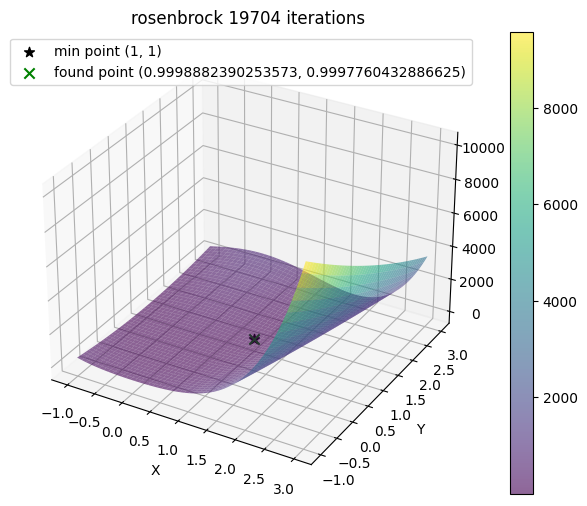

In [57]:
task_pipeline(
    func=rosenbrock, func_grad=rosenbrock_finite_diff,
    gd_func=gd_classic, x = np.linspace(-1,3, 200),
    y = np.linspace(-1,3,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,1]), n = 1, 
    n_params=list(map(lambda el: int(el), [1e5]))
)

Тестирование <br>
Нахождение точки оптиума для функции Бута

1000 / 1000 iterations are done
found min is (0.9662338596933, 3.0337661209166455)
real min is (1, 3)
error (euclidean distance) is: 0.04775251985989093
--- 0.01681375503540039 seconds ---
[0.96623386 3.03376612]


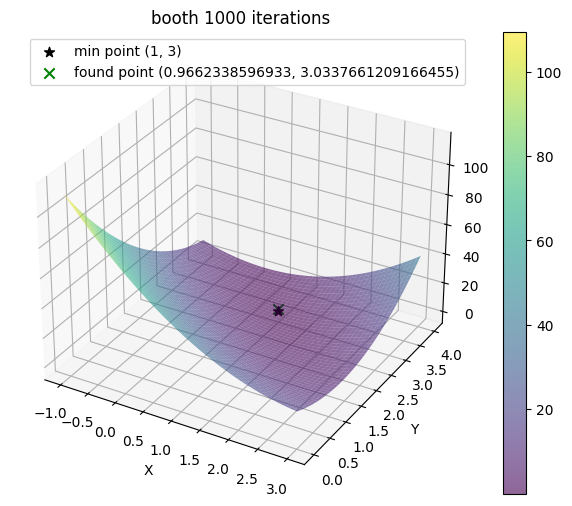

It has stopped on 4428/10000 iteration
critical point has been already found
found min is (0.9999646835673042, 3.0000353164326956)
real min is (1, 3)
error (euclidean distance) is: 4.9944978092923895e-05
--- 0.04813957214355469 seconds ---
[0.99996468 3.00003532]


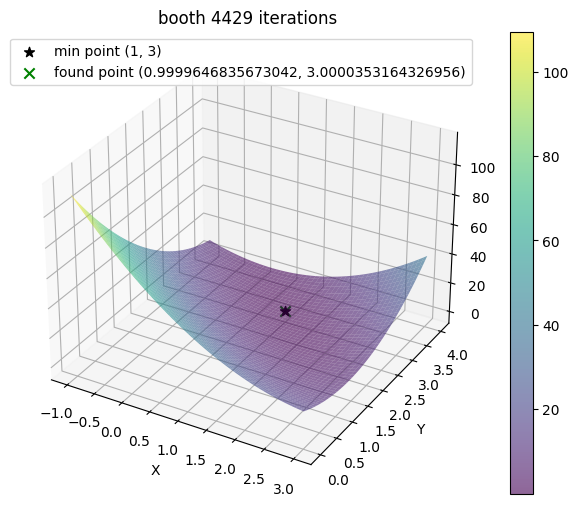

It has stopped on 4428/100000 iteration
critical point has been already found
found min is (0.9999646835673042, 3.0000353164326956)
real min is (1, 3)
error (euclidean distance) is: 4.9944978092923895e-05
--- 0.048540592193603516 seconds ---
[0.99996468 3.00003532]


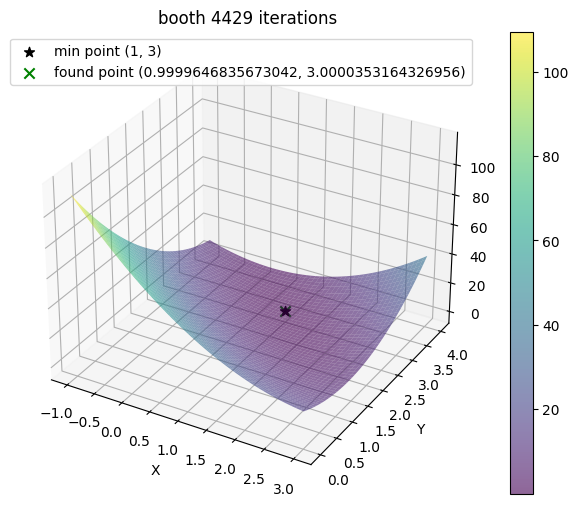

In [58]:
task_pipeline(
    func=booth, func_grad=booth_gradient,
    gd_func=gd_classic, x = np.linspace(-1,3, 200),
    y = np.linspace(0,4,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,3]), n = 3, 
    n_params=list(map(lambda el: int(el), [1e3, 1e4, 1e5]))
)

Используя другие функции для градиента

It has stopped on 4428/100000 iteration
critical point has been already found
found min is (0.9999646835673041, 3.000035316432696)
real min is (1, 3)
error (euclidean distance) is: 4.9944978093316424e-05
--- 0.0589451789855957 seconds ---
[0.99996468 3.00003532]


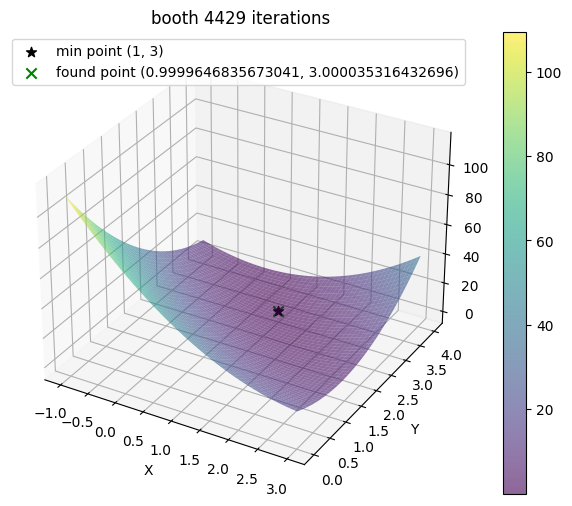

In [59]:
task_pipeline(
    func=booth, func_grad=booth_gradient_sumpy,
    gd_func=gd_classic, x = np.linspace(-1,3, 200),
    y = np.linspace(0,4,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,3]), n = 1, 
    n_params=list(map(lambda el: int(el), [1e5]))
)

It has stopped on 4428/100000 iteration
critical point has been already found
found min is (0.9999646835756049, 3.0000353164238747)
real min is (1, 3)
error (euclidean distance) is: 4.994496598609796e-05
--- 0.11291337013244629 seconds ---
[0.99996468 3.00003532]


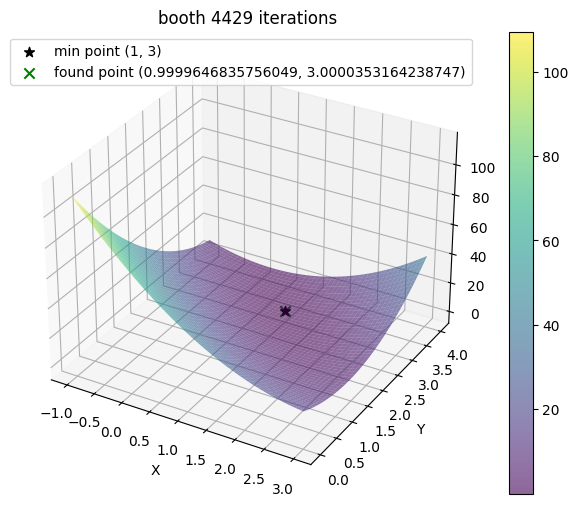

In [60]:
task_pipeline(
    func=booth, func_grad=booth_finite_diff,
    gd_func=gd_classic, x = np.linspace(-1,3, 200),
    y = np.linspace(0,4,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,3]), n = 1, 
    n_params=list(map(lambda el: int(el), [1e5]))
)

Какая подзадача решается: Запрограммировать одну моментную модификацию и протестировать ее

In [61]:
def gd_momentum(func: Callable, func_grad: Callable,
                x_0: np.ndarray, iter_count: int = 20000, lr: float = 1e-3,
                eps: float = 1e-7, gamma: float = 1e-1,
                use_criterion: bool = True,
                ):
    history = []
    x = x_0.copy()
    u = np.zeros_like(x)
    history.append(x)
    i = 0
    for i in range(iter_count):
        u = gamma * u - lr * func_grad(x)
        if use_criterion and np.linalg.norm(np.abs(u)) <= eps:
            print(f'It has stopped on {i}/{iter_count} iteration')
            print(f'critical point has been already found')
            res = {
                'point': x,
                'value': func(x),
                'history': np.array(history),
                'done_iters': i + 1
            }
            return res
        x += u
        history.append(x)
    print(f'{iter_count} / {iter_count} iterations are done')
    res = {
        'point': x,
        'value': func(x),
        'history': np.array(history),
        'done_iters': i + 1
    }
    return res

Тестирование на функции Розенброка

1000 / 1000 iterations are done
found min is (0.7096310503208801, 0.5022072528536183)
real min is (1, 1)
error (euclidean distance) is: 0.5762913725272111
--- 0.01748371124267578 seconds ---
[0.70963105 0.50220725]


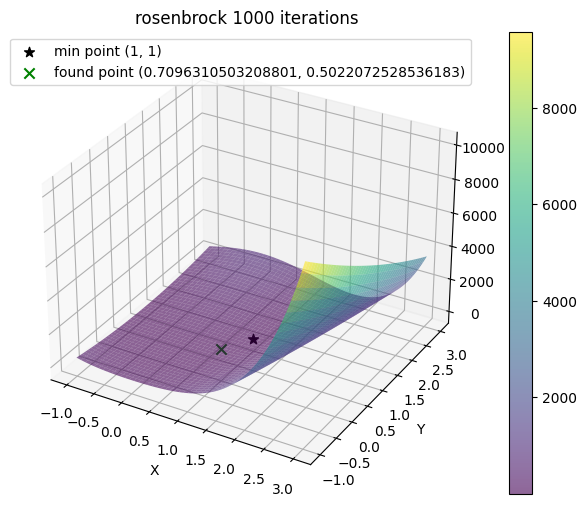

10000 / 10000 iterations are done
found min is (0.9965037021375026, 0.9930056081405187)
real min is (1, 1)
error (euclidean distance) is: 0.007819566242911523
--- 0.12146687507629395 seconds ---
[0.9965037  0.99300561]


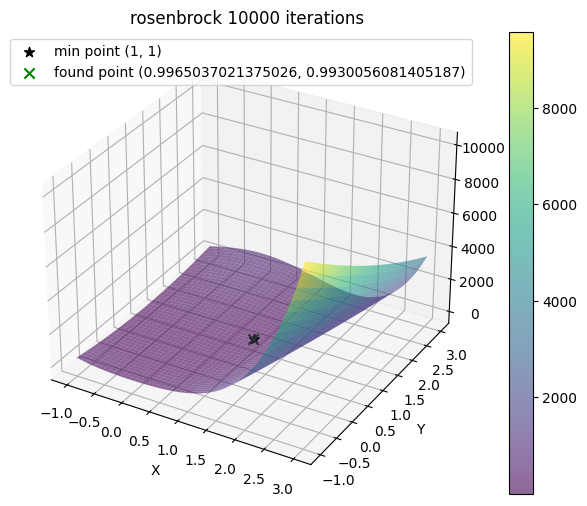

It has stopped on 17982/100000 iteration
critical point has been already found
found min is (0.999899395988135, 0.9997983994962516)
real min is (1, 1)
error (euclidean distance) is: 0.00022530852250843354
--- 0.21778225898742676 seconds ---
[0.9998994 0.9997984]


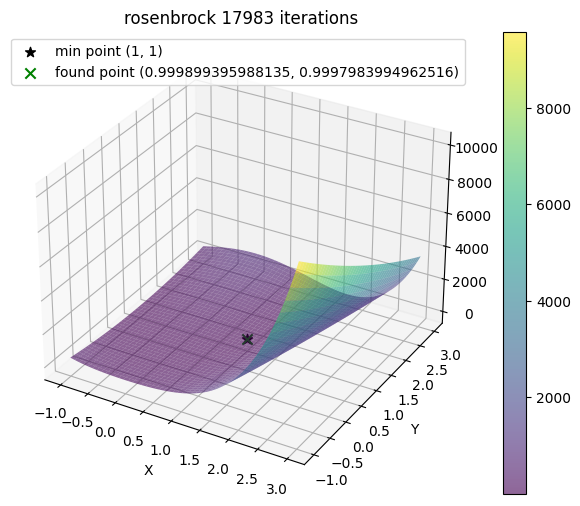

In [62]:
task_pipeline(
    func=rosenbrock, func_grad=rosenbrock_gradient,
    gd_func=gd_momentum, x = np.linspace(-1,3, 200),
    y = np.linspace(-1,3,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,1]), n = 3,
    n_params=list(map(lambda el: int(el), [1e3, 1e4, 1e5])), lr=1e-3
)

Тестирование на функции Бута

It has stopped on 501/1000 iteration
critical point has been already found
found min is (0.9999968606594359, 3.000003139340564)
real min is (1, 3)
error (euclidean distance) is: 4.439698002526385e-06
--- 0.011083364486694336 seconds ---
[0.99999686 3.00000314]


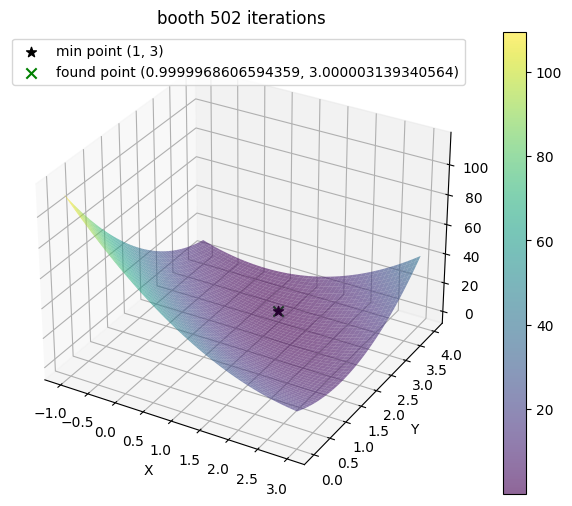

It has stopped on 501/10000 iteration
critical point has been already found
found min is (0.9999968606594359, 3.000003139340564)
real min is (1, 3)
error (euclidean distance) is: 4.439698002526385e-06
--- 0.006816387176513672 seconds ---
[0.99999686 3.00000314]


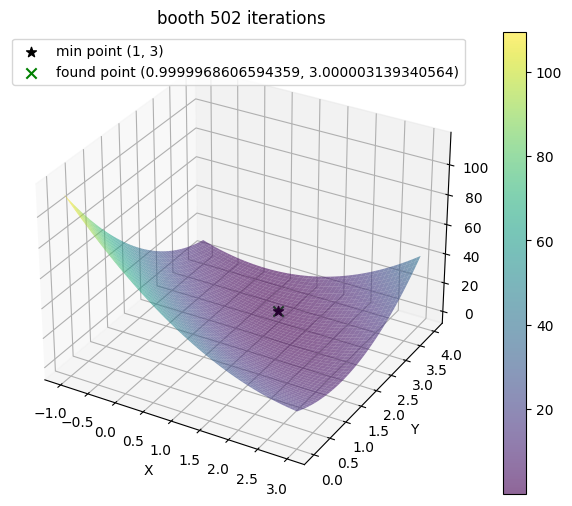

It has stopped on 501/100000 iteration
critical point has been already found
found min is (0.9999968606594359, 3.000003139340564)
real min is (1, 3)
error (euclidean distance) is: 4.439698002526385e-06
--- 0.0067653656005859375 seconds ---
[0.99999686 3.00000314]


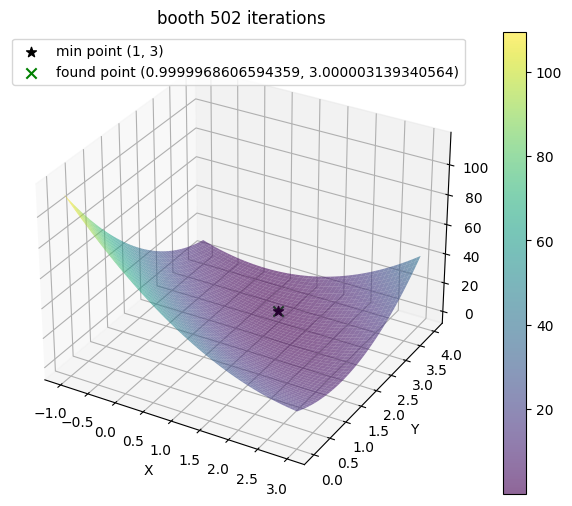

In [63]:
task_pipeline(
    func=booth, func_grad=booth_gradient,
    gd_func=gd_momentum, x = np.linspace(-1,3, 200),
    y = np.linspace(0,4,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,3]), n = 3, 
    n_params=list(map(lambda el: int(el), [1e3, 1e4, 1e5])), lr=1e-2
)

Какая подзадача решается: Запрограммировать одну адаптивную модификацию и протестировать ее

In [64]:
def gd_adaptive(func: Callable, func_grad: Callable,
                x_0: np.ndarray, iter_count: int = 20000, lr: float = 1e-2,
                eps: float = 1e-7, beta1: float = 0.9, beta2: float = 0.999,
                delta: float = 1e-8,
                use_criterion: bool = True,
                ):
    history = []
    x = x_0.copy()
    history.append(x)
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    i = 0
    for i in range(iter_count):
        m = beta1 * m + (1 - beta1) * func_grad(x)
        v = beta2 * v + (1 - beta2)* (func_grad(x) ** 2)
        u = -lr * m / (np.sqrt(v) + delta) 
        if use_criterion and np.linalg.norm(u) <= eps:
            print(f'It has stopped on {i}/{iter_count} iteration')
            print(f'critical point has been already found')
            res = {
                'point': x,
                'value': func(x),
                'history': np.array(history),
                'done_iters': i + 1
            }
            return res
        x += u
        history.append(x)
    print(f'{iter_count} / {iter_count} iterations are done')
    res = {
        'point': x,
        'value': func(x),
        'history': np.array(history),
        'done_iters': i + 1
    }
    return res

Тестирование на функции Розенброка

1000 / 1000 iterations are done
found min is (1.0873470036016049, 1.1826592217761396)
real min is (1, 1)
error (euclidean distance) is: 0.20246948001623286
--- 0.034444570541381836 seconds ---
[1.087347   1.18265922]


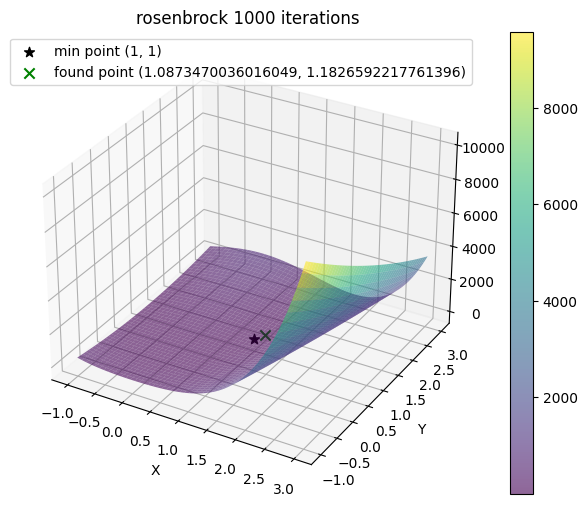

It has stopped on 8162/10000 iteration
critical point has been already found
found min is (1.0000090958546517, 1.0000182287036292)
real min is (1, 1)
error (euclidean distance) is: 2.0372044763516543e-05
--- 0.19459080696105957 seconds ---
[1.0000091  1.00001823]


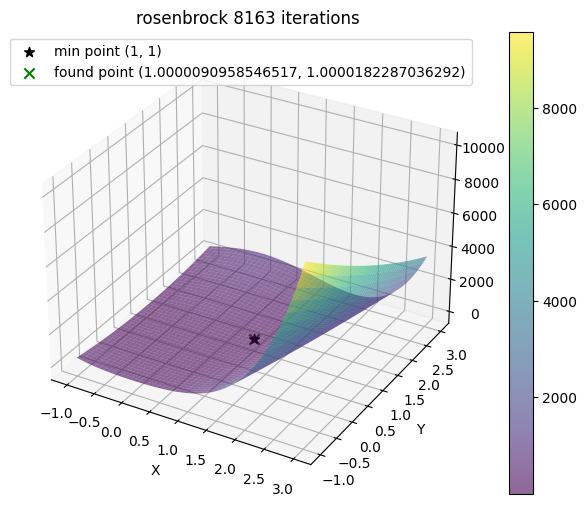

It has stopped on 8162/100000 iteration
critical point has been already found
found min is (1.0000090958546517, 1.0000182287036292)
real min is (1, 1)
error (euclidean distance) is: 2.0372044763516543e-05
--- 0.20023488998413086 seconds ---
[1.0000091  1.00001823]


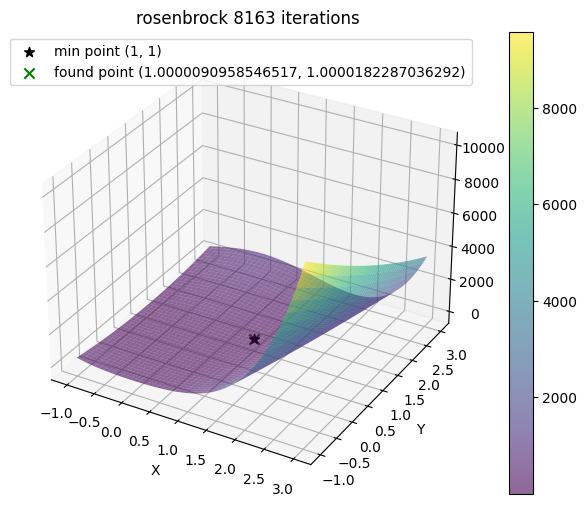

In [65]:
task_pipeline(
    func=rosenbrock, func_grad=rosenbrock_gradient,
    gd_func=gd_adaptive, x = np.linspace(-1,3, 200),
    y = np.linspace(-1,3,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,1]), n = 3,
    n_params=list(map(lambda el: int(el), [1e3, 1e4, 1e5])), lr=1e-2
)

Тестирование на функции Бута

It has stopped on 434/1000 iteration
critical point has been already found
found min is (0.9999978436642836, 3.0000021403488812)
real min is (1, 3)
error (euclidean distance) is: 3.038235845911505e-06
--- 0.018396854400634766 seconds ---
[0.99999784 3.00000214]


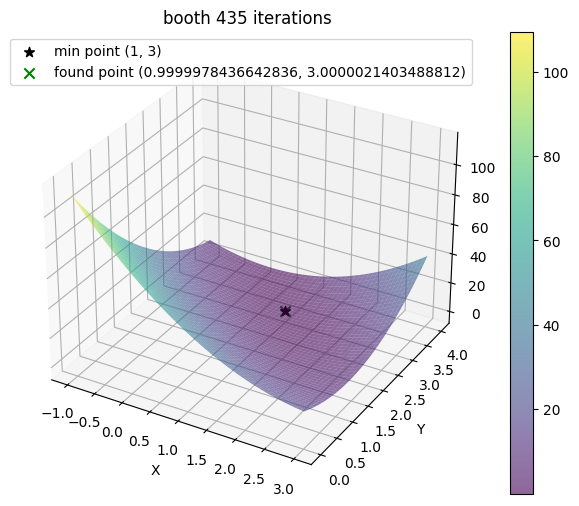

It has stopped on 434/10000 iteration
critical point has been already found
found min is (0.9999978436642836, 3.0000021403488812)
real min is (1, 3)
error (euclidean distance) is: 3.038235845911505e-06
--- 0.012065410614013672 seconds ---
[0.99999784 3.00000214]


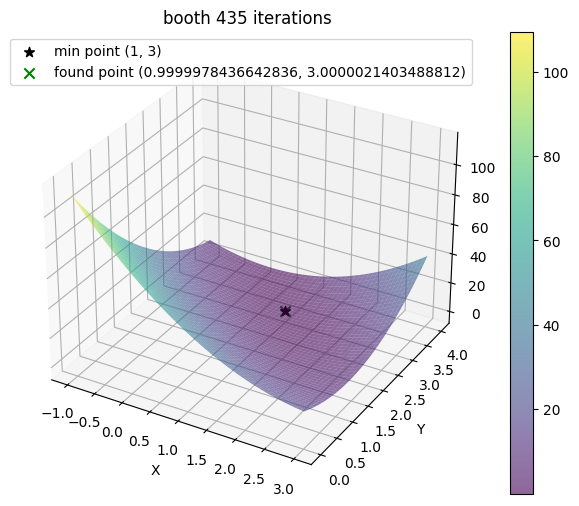

It has stopped on 434/100000 iteration
critical point has been already found
found min is (0.9999978436642836, 3.0000021403488812)
real min is (1, 3)
error (euclidean distance) is: 3.038235845911505e-06
--- 0.01143503189086914 seconds ---
[0.99999784 3.00000214]


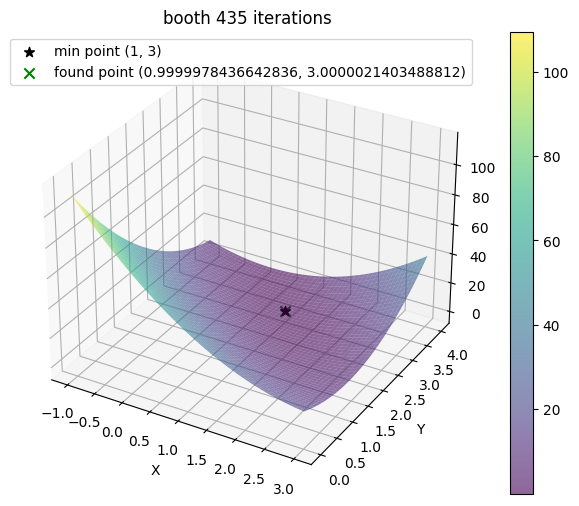

In [66]:
task_pipeline(
    func=booth, func_grad=booth_gradient,
    gd_func=gd_adaptive, x = np.linspace(-1,3, 200),
    y = np.linspace(0,4,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,3]), n = 3, 
    n_params=list(map(lambda el: int(el), [1e3, 1e4, 1e5])), lr=1e-2
)

Какая подзадача решается: Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их

In [67]:
def gd_scheduler(func: Callable, func_grad: Callable,
                x_0: np.ndarray, iter_count: int = 20000, lr: float = 1e-3,
                eps: float = 1e-7, decay_rate: int = 1e9,
                use_criterion: bool = True,
                ):
    history = []
    x = x_0.copy()
    history.append(x)         
    i = 0
    for i in range(iter_count):
        cur_lr =  (lr + lr / 10) * (1 - i / decay_rate)
        u = - cur_lr * func_grad(x)
        if use_criterion and np.linalg.norm(np.abs(u)) <= eps:
            print(f'It has stopped on {i}/{iter_count} iteration')
            print(f'critical point has been already found')
            res = {
                'point': x,
                'value': func(x),
                'history': np.array(history),
                'done_iters': i + 1
            }
            return res
        x += u
        history.append(x)
    print(f'{iter_count} / {iter_count} iterations are done')
    res = {
        'point': x,
        'value': func(x),
        'history': np.array(history),
        'done_iters': i + 1
    }
    return res

Тестирование на функции Розенброка

1000 / 1000 iterations are done
found min is (0.7092614988382825, 0.5016809297612254)
real min is (1, 1)
error (euclidean distance) is: 0.5769322073011688
--- 0.014291048049926758 seconds ---
[0.7092615  0.50168093]


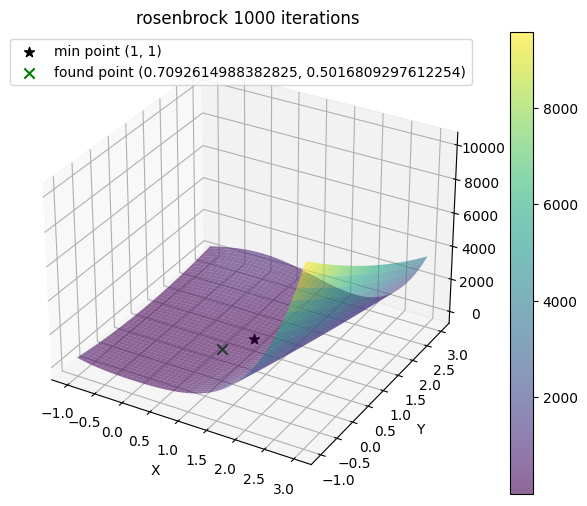

10000 / 10000 iterations are done
found min is (0.9963566133007493, 0.9927118895133672)
real min is (1, 1)
error (euclidean distance) is: 0.008148056277766118
--- 0.10703182220458984 seconds ---
[0.99635661 0.99271189]


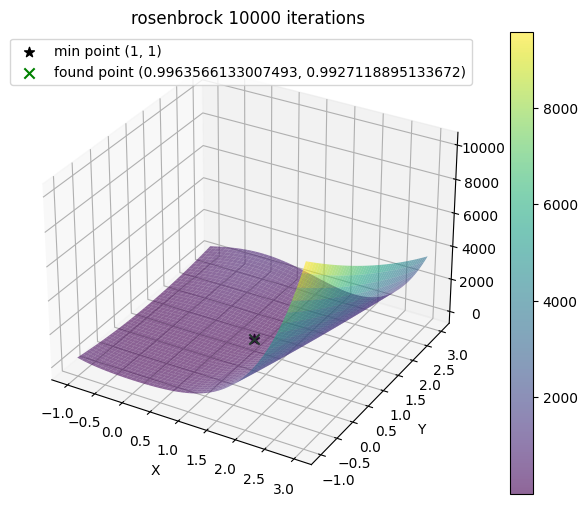

It has stopped on 18134/100000 iteration
critical point has been already found
found min is (0.999898400320755, 0.9997964043780744)
real min is (1, 1)
error (euclidean distance) is: 0.0002275382870858377
--- 0.18040227890014648 seconds ---
[0.9998984 0.9997964]


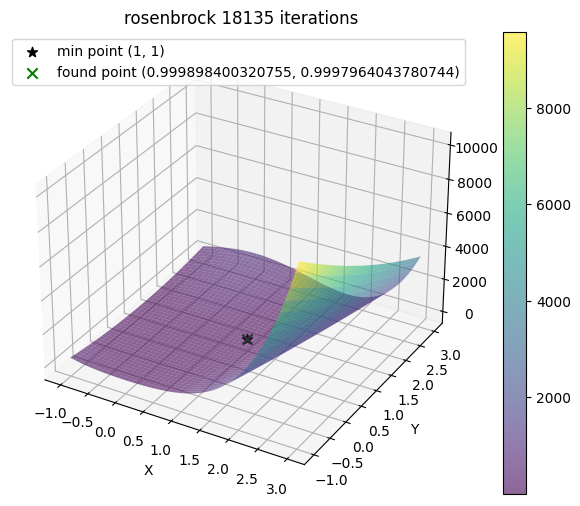

In [68]:
task_pipeline(
    func=rosenbrock, func_grad=rosenbrock_gradient,
    gd_func=gd_scheduler, x = np.linspace(-1,3, 200),
    y = np.linspace(-1,3,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,1]), n = 3,
    n_params=list(map(lambda el: int(el), [1e3, 1e4, 1e5])), lr=1e-3
)

Тестирование на функции Бута

It has stopped on 507/1000 iteration
critical point has been already found
found min is (0.9999968396102898, 3.00000316038971)
real min is (1, 3)
error (euclidean distance) is: 4.469465990328689e-06
--- 0.010736465454101562 seconds ---
[0.99999684 3.00000316]


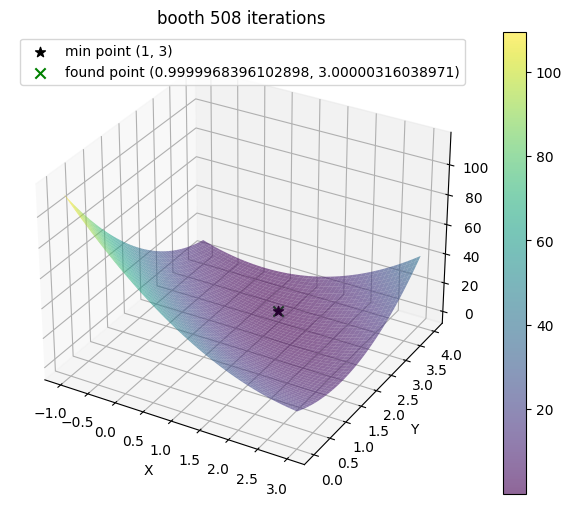

It has stopped on 507/10000 iteration
critical point has been already found
found min is (0.9999968396102898, 3.00000316038971)
real min is (1, 3)
error (euclidean distance) is: 4.469465990328689e-06
--- 0.007370710372924805 seconds ---
[0.99999684 3.00000316]


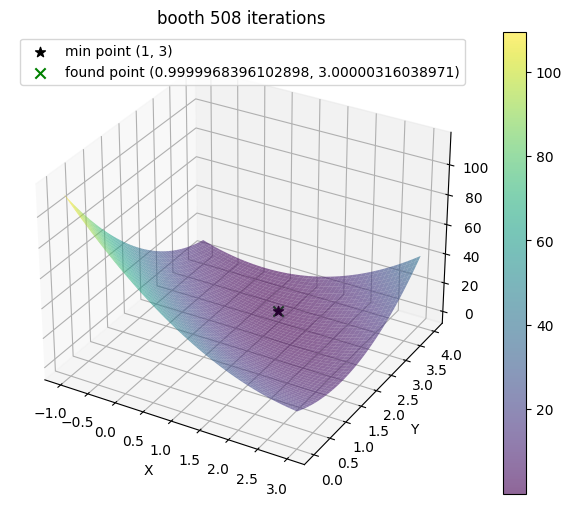

It has stopped on 507/100000 iteration
critical point has been already found
found min is (0.9999968396102898, 3.00000316038971)
real min is (1, 3)
error (euclidean distance) is: 4.469465990328689e-06
--- 0.007215976715087891 seconds ---
[0.99999684 3.00000316]


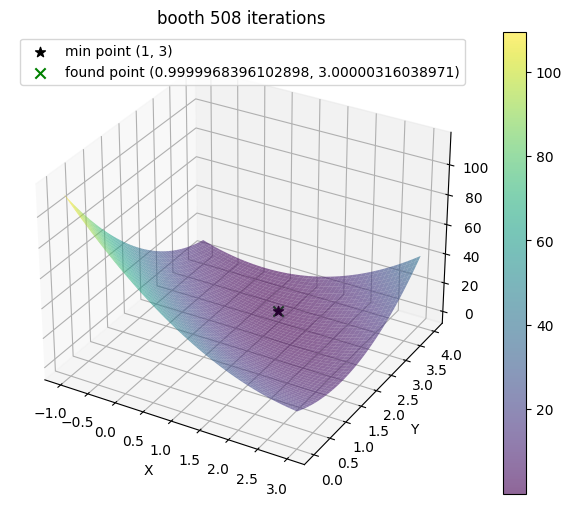

In [69]:
task_pipeline(
    func=booth, func_grad=booth_gradient,
    gd_func=gd_scheduler, x = np.linspace(-1,3, 200),
    y = np.linspace(0,4,200), start_pos=np.array([0,2.5]),
    min_point=np.array([1,3]), n = 3, 
    n_params=list(map(lambda el: int(el), [1e3, 1e4, 1e5])), lr=1e-2
)